# Exercises on solving systems of linear equation

## Exercise 7.1
Implement a `transformed()` method on the `PolygonModel` that returns the points of the model translated by the object's x and y attributes and rotated by its `rotation_angle` attribute.

The translation part was already applied in the model:

```python
class PolygonModel():
    def __init__(self, points):
        self.points = points
        self.rotation_angle = 0
        # x, y keeps track of the center of the polygon
        self.x = 0
        self.y = 0

    # added in section 7.1.2
    def transformed(self):
        return [add((self.x, self.y), v) for v in self.points] 
```

So the only remaining part is to apply the rotation, before the translation.

As we've done while developing the game, we differentiate two contexts:
+ The *Math model* in which the shapes are collections of points that delimit polygons on a traditional coordinate plane that goes from -10 to 10 on each axis, and where we can apply our vector library.
+ The *game engine* that is used to render the game components on a 400x400 window.

Both *contexts* are linked through the `to_pixels(...)` function that takes the *Math model* and translates the points and polygons into something that can be fed into *PyGame* functions.

As a consequence, the rotation should be defined at the *Math model* level, and then we should leave the `to_pixels(...)` function do the rest.

Let's recall what was needed to rotate a vector:


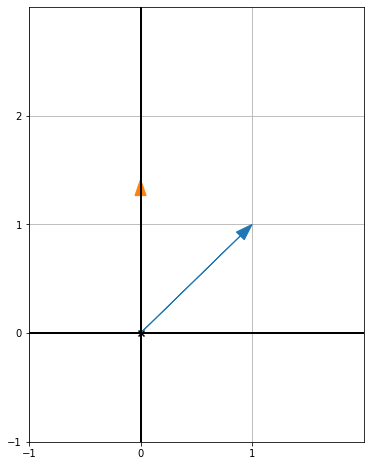

In [7]:
from my_colors import blue, orange
from my_draw2d import draw2d, Arrow2D
from math import pi, sin, cos
from my_vectors import to_polar, to_cartesian

orig_v = (1, 1)
orig_v_polar = to_polar(orig_v)
d, theta = orig_v_polar
theta = theta + pi / 4

rotated_v = to_cartesian((d, theta))

draw2d(Arrow2D(orig_v, color=blue), Arrow2D(rotated_v, color=orange))

In that chapter we even defined a function `rotate2d(...)` so that we don't have to repeat the steps again.

As a result, the `transformed` function will end up being:

In [ ]:
from my_vectors import add, rotate2d
from random import randint, uniform        

class PolygonModel():
    def __init__(self, points):
        self.points = points
        self.rotation_angle = 0
        # x, y keeps track of the center of the polygon
        self.x = 0
        self.y = 0

    def transformed(self):
        rotated_points = [rotate2d(self.rotation_angle, point) for point in self.points]
        return [add((self.x, self.y), rotated_point) for rotated_point in rotated_points]        


Let's check it works with the `Ship`, and on the *Math model* first:

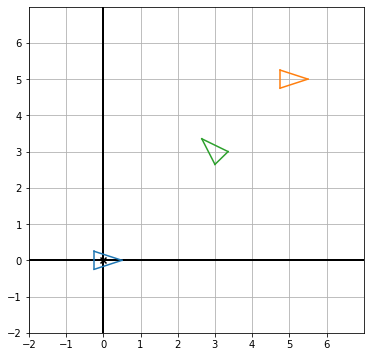

In [12]:
from my_game import Ship
from my_draw2d import draw2d, Polygon2D
from my_colors import blue, orange, green
from math import pi



# blue: not transformed
# orange: translation only
# green: translation and rotation

blue_ship = Ship()

orange_ship = Ship()
orange_ship.x = 5
orange_ship.y = 5

green_ship = Ship()
green_ship.x = 3
green_ship.y = 3
green_ship.rotation_angle = 3 * pi / 4


draw2d(
    Polygon2D(*blue_ship.points, color = blue),
    Polygon2D(*orange_ship.transformed(), color=orange),
    Polygon2D(*green_ship.transformed(), color=green)    
    )



Now, we just need to test it in the game engine to see it also works.

We'll start by making the ship to rotate 360° every 5 seconds.

(this is the [Step 3](../e01-exercises/asteroids_step3.py))

In [1]:
from asteroids_step3 import main

main()

pygame 2.0.0 (SDL 2.0.12, python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 0

In [ ]:
## Exercise 7.2

Implement the function `to_pixels(x, y)` that takes a pair of x-y coordinates in the square where $ -10 < x < 10 $ and $ -10 < y < 10 $ and maps them to the PyGame engine pixel coordinates which ranges from 0 to 400 with the $ (0, 0) $ placed in the top left corner, x increasing to the right and y increasing to the bottom.